# Predictive Model 

Este trabalho tem como objetivo gerar um modelo preditivo sobre a ocupação do Bandejão (occupation) baseado em parametros tais como: tipo de Restaurante (restaurant), Dia da semana(dayOfWeek), Cardapio oferecido(menu) e Hora(hour).

Como resultado se obteve que o modelo consegue predizer quando o bandejão esta: Vazio(1), Moderado(2), Movimentado(3), Lotado(4) com uma accuracia de aproximandamente 80% , o qual permite dar uma boa estimativa do accesso ao bandejão em quebras de tempo de cada 15 min.

Neste trabalho são apresentadas todas as etapas referentes a ciencia dos dados:
- limpeza do dado,
- procesamento, 
- treinamento, 
- test e validação do modelo predito


In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import seaborn as sns

# display results to 3 decimal points, not in scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#download the files with we are going to work
#dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
dataset_url = '..\dataset\dataset_2.csv'
data = pd.read_csv(dataset_url,sep=',' )
data = data.dropna()

data.head()

,referenceDate,restaurant,dayOfWeek,menu,hour,occupation
0,2018-03-05,1,3,2,13_3,3
1,2018-03-05,1,3,2,12_3,4
2,2018-03-05,1,3,2,13_2,4
3,2018-03-05,1,3,2,11_3,2
4,2018-03-05,1,3,2,12_2,3


## Descriptive Statistics using pandas



In [68]:
print ('number of rows and columns: {}'.format(data.shape))
print('Description of data {}' .format(data.describe()))

number of rows and columns: (5473, 6)
Description of data        restaurant  dayOfWeek     menu  occupation
count    5473.000   5473.000 5473.000    5473.000
mean        2.309      2.216    3.399       2.069
std         1.052      1.613    1.705       1.065
min         1.000      0.000    1.000       1.000
25%         1.000      1.000    2.000       1.000
50%         2.000      2.000    4.000       2.000
75%         3.000      3.000    5.000       3.000
max         4.000      6.000    6.000       4.000


In [69]:
 data.dtypes


referenceDate    object
restaurant        int64
dayOfWeek         int64
menu              int64
hour             object
occupation        int64
dtype: object

In [66]:
dataframe = data.sort_values(['referenceDate','hour','dayOfWeek','restaurant'])
dataframe.head()


,referenceDate,restaurant,dayOfWeek,menu,hour,occupation
122,2018-03-05,1,0,4,11_0,1
161,2018-03-05,2,0,1,11_0,1
355,2018-03-05,3,0,6,11_0,1
394,2018-03-05,4,0,5,11_0,1
38,2018-03-05,1,1,1,11_0,1


### Check the missing values


In [90]:
dataframe.isnull().sum()

referenceDate    0
restaurant       0
dayOfWeek        0
menu             0
hour             0
occupation       0
dtype: int64

### Analysis of each parameter in the dataset

Nesta seção é apresentada a distribuição de cada paramentro dentro do dataset

#### Restaurant 

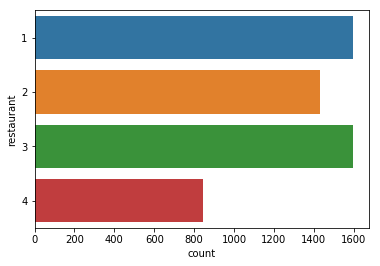

In [115]:
sns.countplot(y="restaurant", data=dataframe)
plt.show()

#### menu

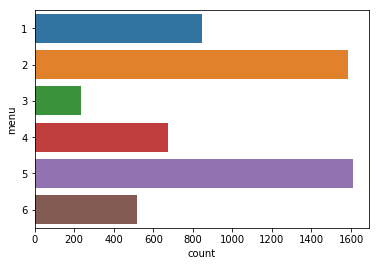

In [116]:
sns.countplot(y="menu", data=dataframe)
plt.show()

#### target data: occupation

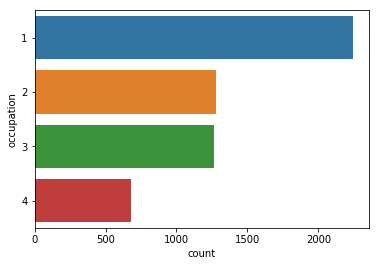

In [170]:
sns.countplot(y="occupation", data=dataframe)
plt.show()

### Analise da ocupação de cada restaurante segundo a hora

- O grafico demuestra que os horarios que os bandejões em geral ficam mais vazios são entre 11:00-12:00 e 18:00-18:30. 
- O grafico tambem mostra que o peor horario para ir bandejar são entre 12:45 e 13:30


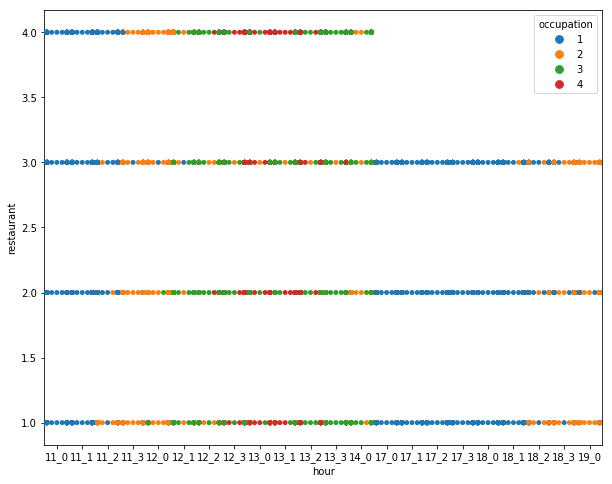

In [189]:

plt.subplots(figsize=(10,8))
sns_plot=sns.swarmplot(x="hour", y="restaurant", hue="occupation", data=dataframe)
fig1 = sns_plot.get_figure()
fig1.savefig("output.png")


### Analise de ocupação por hora segundo a variação do cardapio
- O grafico demostra que existe uma maior lotação quando são oferecidos os cardapios 5, 6
- e uma menor lotação quando se oferece o cardapio 1, 2
- O cardapio 3 geralmente é oferecido no horario  de 17:15-19:00

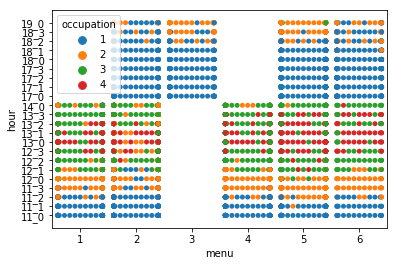

In [195]:
sns.swarmplot(y="hour", x="menu", hue="occupation", data=dataframe)


### Grafico de correlação geral das variaveis em função da ocupação

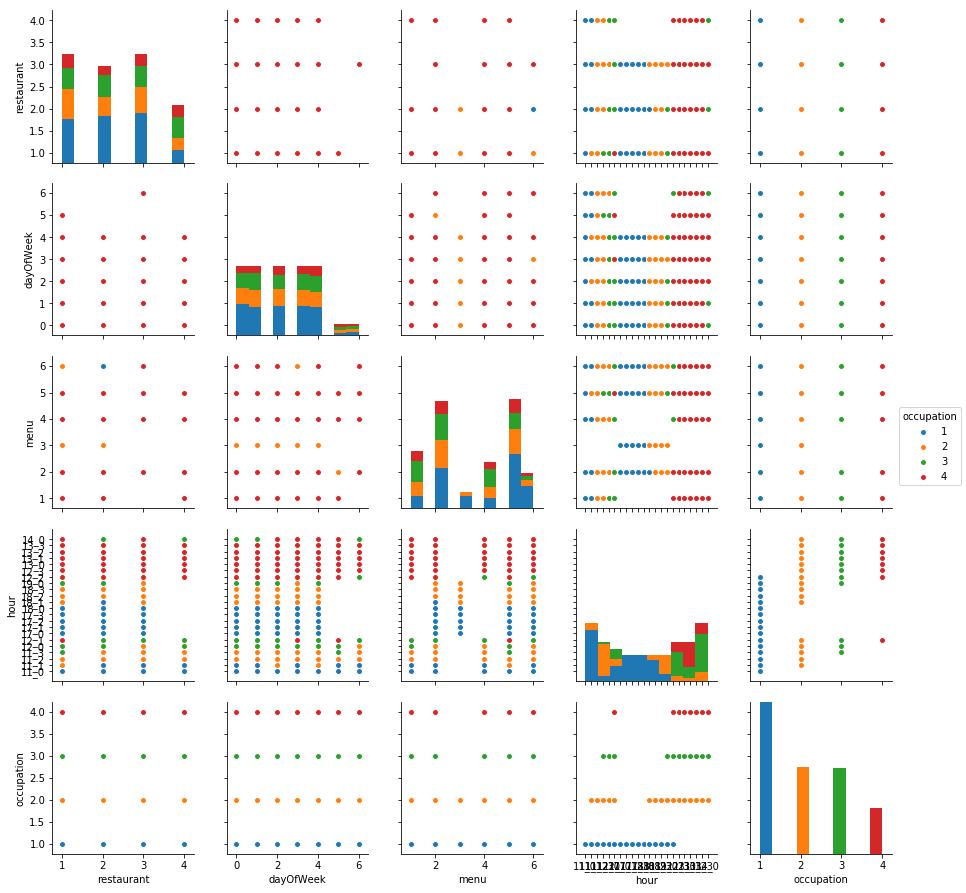

In [176]:
sns.pairplot(dataframe, hue="occupation")


## Check the independence between the independent variables

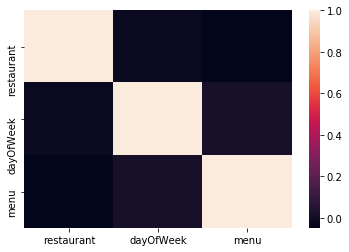

In [98]:
X = dataframe.drop('occupation', axis=1)
X = X.drop('referenceDate', axis=1)
sns.heatmap(X.corr())
plt.show()

## Split Data: Train data and Test Data

In [198]:

#split data
X_train, x_test, Y_train, y_test = train_test_split(X , dataframe.occupation, test_size=0.2, random_state=0)
#show number of train data 
X_train.shape, Y_train.shape


((4378, 4), (4378,))

## Predicting the data and creating confusion matrix

In [148]:
#create logistic regression
#lm = LogisticRegression(random_state=0)
lm = DecisionTreeClassifier()
lm.fit(X_train,Y_train)
predic_train =lm.predict(X_train)
predic_test =lm.predict(x_test)
predic_test

array([3, 1, 1, ..., 2, 1, 1], dtype=int64)

## Validation of Model

### Confusion Matrix

In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predic_test)

print (confusion_matrix)


[[416  37   3   0]
 [ 25 179  35   8]
 [  2  28 183  44]
 [  0   7  49  79]]


## Compute Accuracy, precision, recall, F-measure and support

In [121]:
print('Accuracy of DecisionTree classifier on test set: {:.2f}'.format(lm.score(x_test, y_test)))

Accuracy of DecisionTree classifier on test set: 0.78


In [150]:
print("mean squared error on test set:")
print (mean_squared_error(y_test, predic_test))

mean squared error on test set:
0.2730593607305936


In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predic_test))

             precision    recall  f1-score   support

          1       0.94      0.91      0.93       456
          2       0.71      0.72      0.72       247
          3       0.68      0.71      0.69       257
          4       0.60      0.59      0.59       135

avg / total       0.79      0.78      0.78      1095



In [112]:
#MSE
mse_train = np.mean((predic_train-Y_train)** 2)
mse_test = np.mean((predic_test-y_test)**2)

In [113]:
print ("Fit a model X_train and calculate MSE with Y_train:", mse_train)
print ("Fit a model X_train and calculate MSE with X_test, Y_test:", mse_test)

Fit a model X_train and calculate MSE with Y_train: 0.1706258565555048
Fit a model X_train and calculate MSE with X_test, Y_test: 0.2730593607305936


### DecisionTree classifier Graph

In [197]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz 
dot_data = export_graphviz(lm, out_file=None) 
graph = graphviz.Source(dot_data) 

feature_name = ['restaurant','dayOfWeek','menu','hour']
target_name = ['occupation']


dot_data = export_graphviz(lm, out_file=None, 
                         feature_names= features_name,  
                         class_names= target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph


ModuleNotFoundError: No module named 'graphviz'

## Improving The model

In [132]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [151]:
pipeline = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(n_estimators=100))
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}
# 7. Tune model using cross-validation pipeline
lm2 = GridSearchCV(pipeline, hyperparameters, cv=10)
lm2.fit(X_train,Y_train)
predic_train2 =lm2.predict(X_train)
predic_test2 =lm2.predict(x_test)

In [152]:
print ('Accuracy of DecisionTree classifier on test set:')
print (r2_score(y_test, predic_test2))
print("mean squared error on test set:")
print (mean_squared_error(y_test, predic_test2))

Accuracy of DecisionTree classifier on test set:
0.8472825665598875
mean squared error on test set:
0.17411131144724515
